#WULAN MAHARANI(F55120111)

#DEEP LEARNING

In [41]:
import numpy as np
import pandas as pd
import os
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers.legacy import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import ImageDataGenerator

In [42]:
IMAGE_SIZE = 224
classes = 2

In [43]:
train_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=5,
        width_shift_range=0.1,
        height_shift_range=0.1,
        horizontal_flip=True,
        fill_mode="nearest")

train_generator = train_datagen.flow_from_directory(
        'D:/SEMESTER 6/Deep Learning/TUGAS/TUGAS3/jeruk2/train',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        class_mode="sparse")

Found 160 images belonging to 2 classes.


In [44]:
class_name = list(train_generator.class_indices.keys())
class_name

['JerukMasak', 'JerukTidakMasak']

In [45]:
test_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=5,
        width_shift_range=0.1,
        height_shift_range=0.1,
        horizontal_flip=True,
        fill_mode="nearest")

test_generator = train_datagen.flow_from_directory(
        'D:/SEMESTER 6/Deep Learning/TUGAS/TUGAS3/jeruk2/test',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        class_mode="sparse")

Found 20 images belonging to 2 classes.


In [46]:
class callBack(tf.keras.callbacks.Callback):
    def on_epoch_end(self,epoch,logs={}):
        if(logs.get('accuracy')>0.99):
            print("\nAkurasi mencapai 99%")
            self.model.stop_training = True
            
callbacks=callBack()

In [47]:
model = Sequential()
model.add(Conv2D(input_shape=(224, 224, 3), filters=64, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=64, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))


In [48]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_26 (Conv2D)          (None, 224, 224, 64)      1792      
                                                                 
 conv2d_27 (Conv2D)          (None, 224, 224, 64)      36928     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 112, 112, 64)     0         
 g2D)                                                            
                                                                 
 conv2d_28 (Conv2D)          (None, 112, 112, 128)     73856     
                                                                 
 conv2d_29 (Conv2D)          (None, 112, 112, 128)     147584    
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 56, 56, 128)      0         
 g2D)                                                 

In [49]:
model.add(Flatten())
model.add(Dense(units=4096, activation= "relu"))
model.add(Dense(units=4096, activation= "relu"))
model.add(Dense(units=2, activation= "softmax"))

In [50]:
model.compile(optimizer='Adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

In [51]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_26 (Conv2D)          (None, 224, 224, 64)      1792      
                                                                 
 conv2d_27 (Conv2D)          (None, 224, 224, 64)      36928     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 112, 112, 64)     0         
 g2D)                                                            
                                                                 
 conv2d_28 (Conv2D)          (None, 112, 112, 128)     73856     
                                                                 
 conv2d_29 (Conv2D)          (None, 112, 112, 128)     147584    
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 56, 56, 128)      0         
 g2D)                                                 

In [ ]:
history = model.fit(
    train_generator#merupakan data generator untuk data latih yang telah diproses menggunakan ImageGenerator
    ,
    validation_data=test_generator,
    epochs=15,
    batch_size= 32,
    shuffle= True,
    callbacks=[callbacks]
)


Epoch 1/15
5/5 [==============================] - 328s 64s/step - loss: 0.7657 - accuracy: 0.4812 - val_loss: 0.6922 - val_accuracy: 0.5000
Epoch 2/15
5/5 [==============================] - 295s 54s/step - loss: 0.7000 - accuracy: 0.4250 - val_loss: 0.6933 - val_accuracy: 0.5000
Epoch 3/15
5/5 [==============================] - 281s 50s/step - loss: 0.6948 - accuracy: 0.5000 - val_loss: 0.6933 - val_accuracy: 0.5000
Epoch 4/15
5/5 [==============================] - 348s 71s/step - loss: 0.6939 - accuracy: 0.4375 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 5/15
5/5 [==============================] - 439s 86s/step - loss: 0.6944 - accuracy: 0.4875 - val_loss: 0.6934 - val_accuracy: 0.5000
Epoch 6/15
5/5 [==============================] - 353s 69s/step - loss: 0.6936 - accuracy: 0.5000 - val_loss: 0.7386 - val_accuracy: 0.5000
Epoch 7/15
5/5 [==============================] - 420s 84s/step - loss: 0.7048 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 8/15
5/5 [====

In [ ]:
scores = model.evaluate(test_generator)

In [35]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

EPOCHS = 15

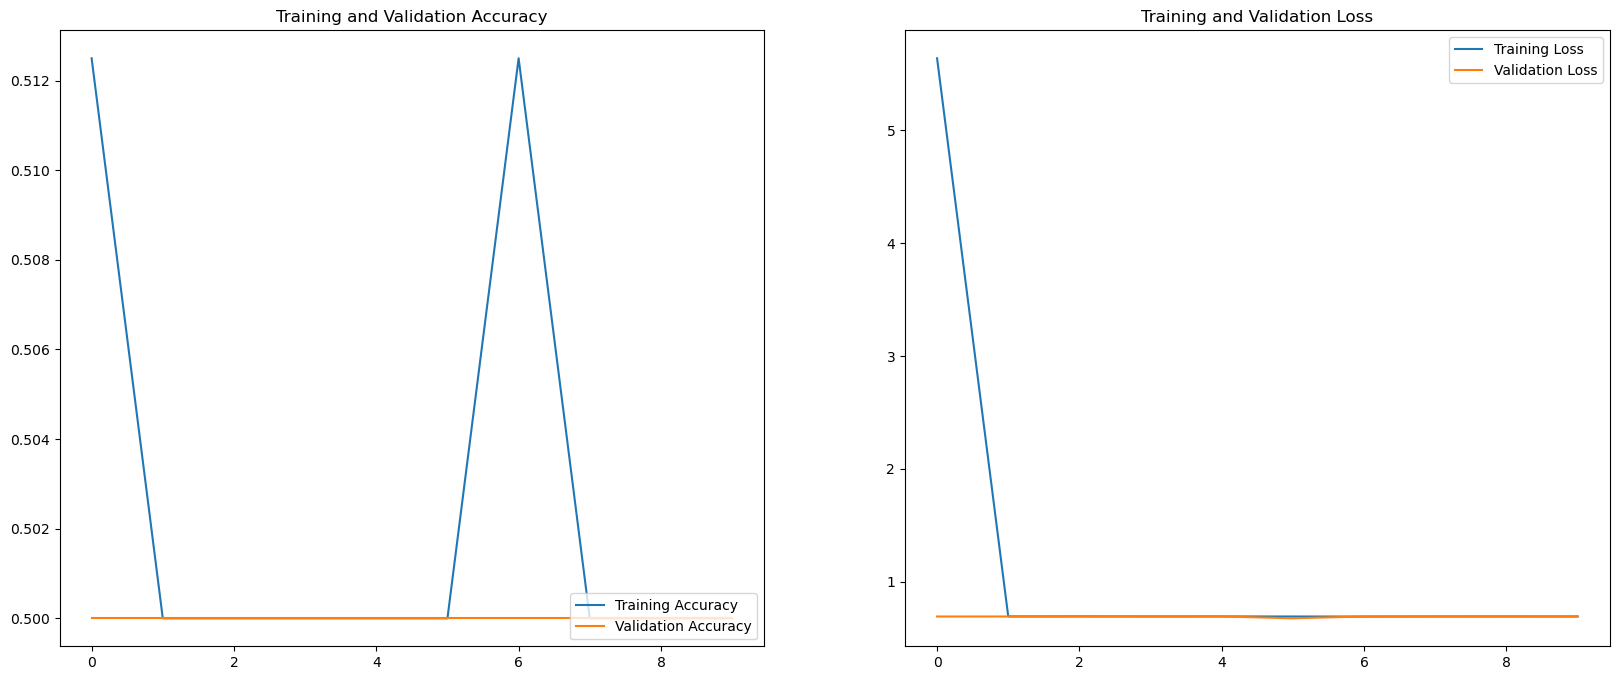

In [36]:
plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [37]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i])
    img_array = tf.expand_dims(img_array, 0)
    predictions = model.predict(img_array)
    predicted_class = class_name[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 [==============================] - 0s 458ms/step


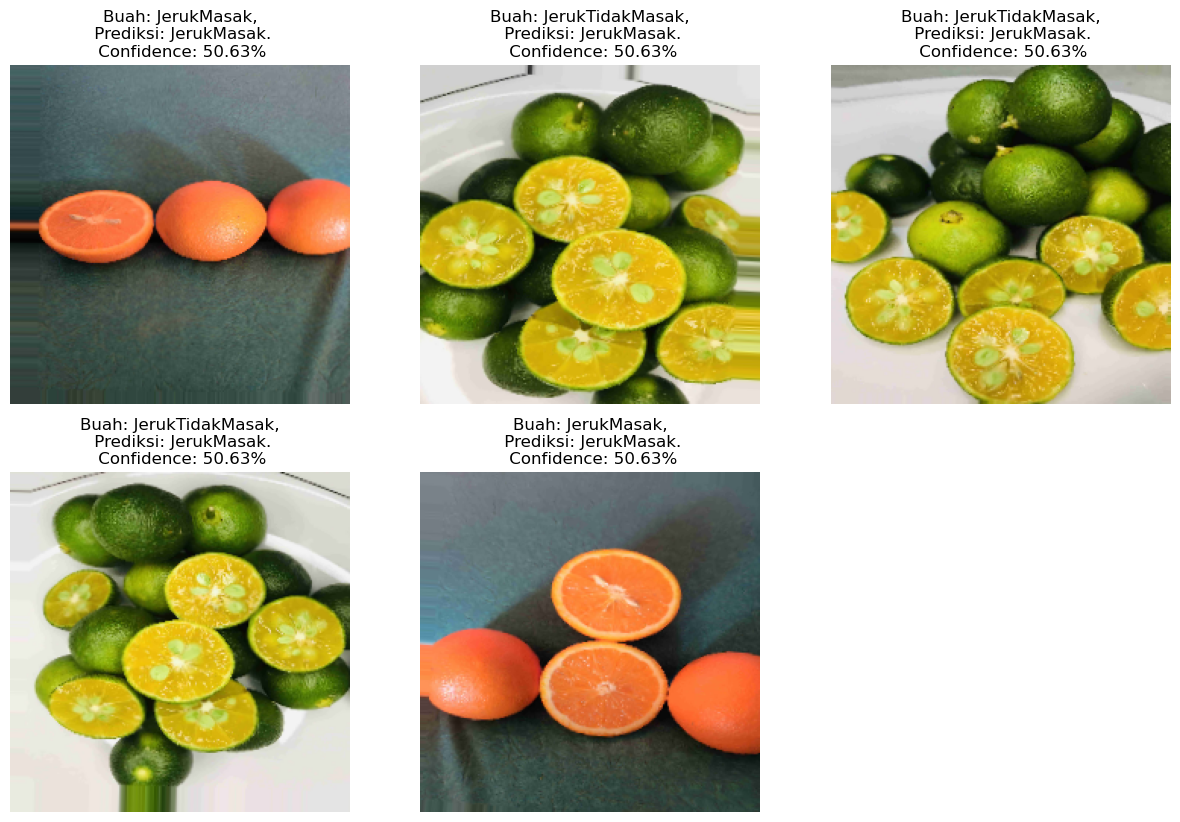

In [39]:
plt.figure(figsize=(15, 15))

for images, labels in test_generator:
    for i in range(5):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])
        predicted_class, confidence = predict(model, images[i])
        actual_class = class_name[int(labels[i])] 
        plt.title(f"Buah: {actual_class},\n Prediksi: {predicted_class}.\n Confidence: {confidence}%")
        plt.axis("off")
    break